In [2]:
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.test_env import TestEnv
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:

# make gym environment 
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None, is_slippery=True)
frozen_lake.reset(seed=42)

(0, {'prob': 1})

In [4]:
# VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration()

runtime = 0.34 seconds


/home/suhendro/miniconda3/envs/mlhw4/lib/python3.10/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


In [5]:
a = []
for i in range(50):
    test_scores = TestEnv.test_env(env=frozen_lake, n_iters=100, render=False, pi=pi, user_input=False)
    a.append(test_scores)
print(np.mean(a))

/home/suhendro/miniconda3/envs/mlhw4/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0.8892


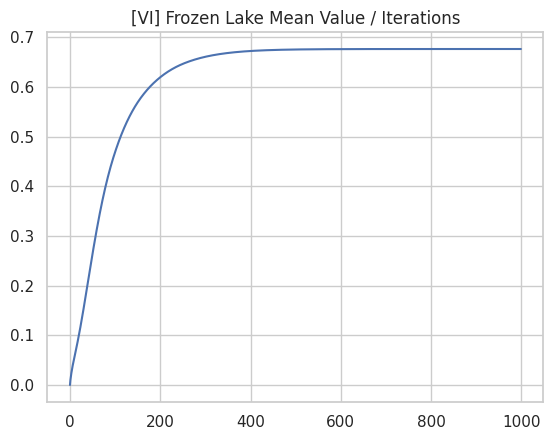

In [6]:

# mean_V / iter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "[VI] Frozen Lake Mean Value / Iterations")


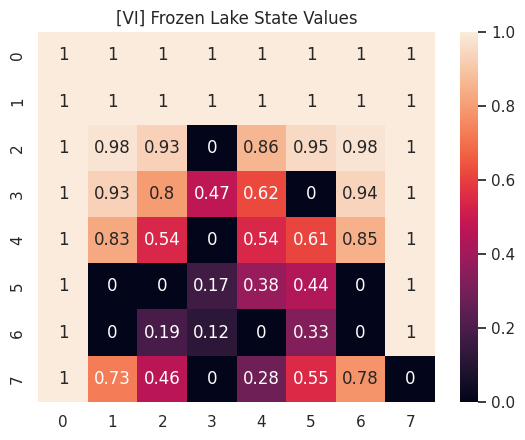

In [8]:

#state values plot
size=(8,8)
Plots.values_heat_map(V, "[VI] Frozen Lake State Values", size)

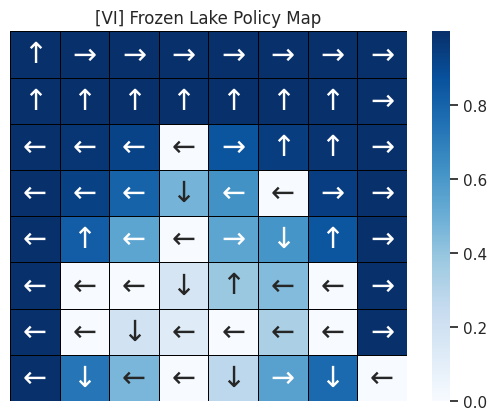

In [9]:

# policy map plot
frozen_lake_map_size = (8,8)
# frozen_lake_action ={
#     0: "Left",
#     1: "Down",
#     2: "Right",
#     3: "Up"
# }
frozen_lake_action = {0: "←", 1: "↓", 2: "→", 3: "↑"}

val_max, policy_map = Plots.get_policy_map(pi, V, frozen_lake_action, frozen_lake_map_size)

#plot policy map
title="[VI] Frozen Lake Policy Map"
Plots.plot_policy(val_max, policy_map, frozen_lake_action, title)